In [88]:
!python --version

Python 3.7.15


## Philippine Food Prices

## Part 0. Data ingest
Along with my submission, there is a CSV file: 

* Philippine Food Prices Data by the World Food Programme Database [wfp_food_prices_phl.csv] 

The code cells below will (1) mount your Google Drive and (2) load these CSV files from your Google Drive folder.

When you run the cell below, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [89]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Define the directory path to the location of the file, i.e. if it is in a folder named "UP DSSoc" under My Drive, then the file path will be "/content/drive/My Drive/UP DSSoc". Change the string variable in the code cell below, as needed:

In [90]:
file_path = "/content/drive/My Drive/UP DSSoc/DS 101/"

Now, we can load the file using **pandas read_csv** function below.

In [91]:
import numpy as np
import pandas as pd

df1 = pd.read_csv(file_path + 'wfp_food_prices_phl.csv', index_col = 0) # index_col sets the data frame index to the first column, the time series data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,5,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## PART 1. Data Preparation

Let's see what does the dataframe look like. Printing out the first couple of rows.

In [92]:
df1.head()

,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
date,,,,,,,,,,,,,
#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,Maize flour (yellow),KG,actual,Retail,PHP,15.0,0.2623
2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,Retail,PHP,20.0,0.3498
2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,Wholesale,PHP,18.35,0.3209
2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,18.0,0.3148


In [93]:
# drop first row
df1 = df1.iloc[1:, :]
df1.head()

,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
date,,,,,,,,,,,,,
2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,Maize flour (yellow),KG,actual,Retail,PHP,15.0,0.2623
2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,Retail,PHP,20.0,0.3498
2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,Wholesale,PHP,18.35,0.3209
2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,18.0,0.3148
2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Wholesale,PHP,16.35,0.2859


## PART 2. Data Analysis and Visualization

### A. Commodity Prices

Show prices based on (1) volume of users, (2) frequency of edits, and (3) “avidness of fans” (i.e., average no. of edits per user). Also, discuss any pre-processing that you performed for this problem.

Plotting the retail price of rice in Metro Manila from 2000-2022

We can now see that this is a time-series data, with geospatial coordinates. Therefore, we can also employ GeoPandas module for this.


But first, we can with the prices of the most staple food for Filipinos, that is, **Rice**. We must search for Rice prices in the *commodity* column. And naively,  ascribe a logical condition if the given string therein, contains the keyword 'Rice'. 


However, we will get an empty Data Frame, as the program would only find rows with the exact string 'Rice' as a commodity. Contrary to what we see in the data itself that it takes on many forms. May be it 'Rice (milled, superior)', 'Rice (regular, milled)', 'Rice (special)' and others that we might not see. 


It would be tedious to search for these phrases altogether. And there can be forms of 'Rice' in the column that's hidden from us, compromising our inference.


In [94]:
df1[df1['commodity'] == 'Rice']

,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
date,,,,,,,,,,,,,


The more rational thing to do is to use the str.contains function, in place of the logical condition. As this scrutinizes the data for any rows that contain the keyword, 'Rice'.

We now call this new data frame, **Rice_Prices**

In [95]:
Rice_Prices = df1[ df1['commodity'].str.contains("Rice") ]

Rice_Prices

,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
date,,,,,,,,,,,,,
2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,Retail,PHP,20.0,0.3498
2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,Wholesale,PHP,18.35,0.3209
2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,18.0,0.3148
2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Wholesale,PHP,16.35,0.2859
2000-01-15,Region III,Nueva Ecija,Palayan,15.5415,121.0848,cereals and tubers,"Rice (milled, superior)",KG,actual,Retail,PHP,19.0,0.3323
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-15,Region XIII,Surigao del Norte,Surigao del Norte,9.789983,125.495822,cereals and tubers,Rice (special),KG,actual,Retail,PHP,45.65,0.7983
2022-03-15,Region XIII,Surigao del Norte,Surigao del Norte,9.789983,125.495822,cereals and tubers,Rice (well milled),KG,actual,Retail,PHP,39.7,0.6943
2022-03-15,Region XIII,Surigao del Sur,Surigao del Sur,9.056504,126.196915,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,37.51,0.656


Next thing we can do (using the new data frame), is to isolate the prices from a single location only. 

Here, we'll take the capital Metro Manila. SInce we're fairly sure that it is the only form of that name, as it is a proper noun, we can now use our logical condition. It is also helpful to remember that the string we find for is also Case and Character sensitive, so put the exact syntax.

We call this data frame, **Rice_Prices_Manila**

In [96]:
Rice_Prices_Manila = Rice_Prices[ Rice_Prices['market'] == "Metro Manila"]
Rice_Prices_Manila

,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
date,,,,,,,,,,,,,
2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,Retail,PHP,20.0,0.3498
2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,Wholesale,PHP,18.35,0.3209
2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,18.0,0.3148
2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Wholesale,PHP,16.35,0.2859
2000-02-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,Retail,PHP,20.0,0.3498
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,Rice (special),KG,actual,Retail,PHP,52.83,0.9239
2022-02-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,Rice (well milled),KG,actual,Retail,PHP,42.84,0.7492
2022-03-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,38.86,0.6796


From this, we can plot the Rice's price fluctutations in Metro Manila from 2000-2022 using matplotlib.

But before plotting, we need to ensure that the datastamps are converted into datetype64, and float64 suitable for numpy operations. We also have to separate, wholesale and retail prices as they are different on the same time

---



In [97]:
Rice_Prices_Manila_Wholesale = Rice_Prices_Manila[ Rice_Prices_Manila['pricetype'] == "Wholesale"]

Rice_Prices_Manila_Retail = Rice_Prices_Manila[ Rice_Prices_Manila['pricetype'] == "Retail"]

In [98]:
from matplotlib import pyplot as plt

date1 = Rice_Prices_Manila_Retail.index
price1 = Rice_Prices_Manila_Retail['price']

date2 = Rice_Prices_Manila_Wholesale.index
price2 = Rice_Prices_Manila_Wholesale['price']


date1 = pd.to_datetime( date1 )
price1 = price1.astype(float)

date2 = pd.to_datetime( date2 )
price2 = price2.astype(float)
# I could've done this on the original dataset, so I wouldn't have to reiterate it per pricetype, but this exact method begets an error there.


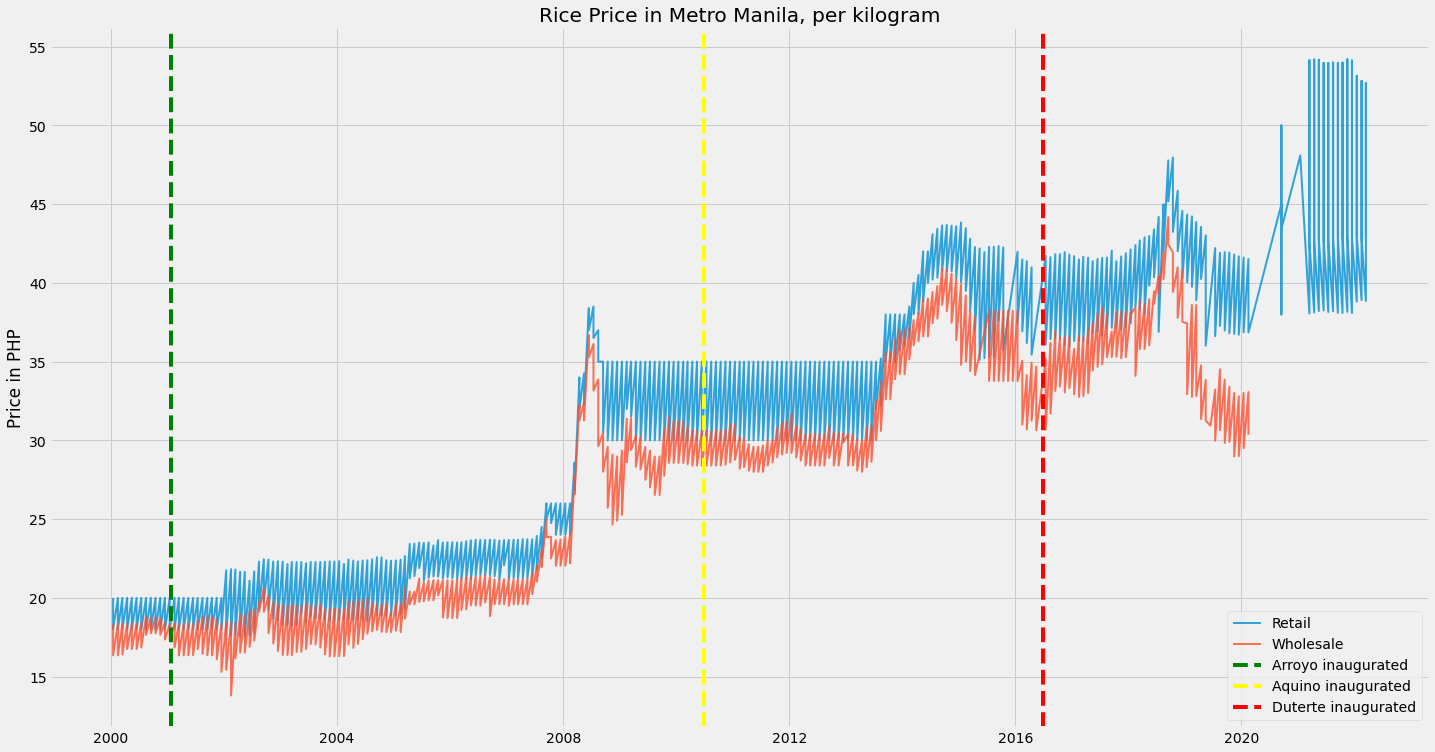

In [138]:
plt.style.use("fivethirtyeight")

plt.figure(figsize=(22, 12))

plt.plot(date1, price1, label= 'Retail', lw=2, alpha = 0.8)
plt.plot(date2, price2, label= 'Wholesale', lw=2, alpha = 0.8 )



plt.ylabel('Price in PHP')
plt.title('Rice Price in Metro Manila, per kilogram')
plt.legend()

# Potting the different administrations' period
plt.axvline(pd.to_datetime('2001-01-20'), color='green', linestyle='--', label = 'Arroyo inaugurated') # Arroyo inaugurated on January 20, 2001
plt.axvline(pd.to_datetime('2010-06-30'), color='yellow', linestyle='--', label = 'Aquino inaugurated') # Aquino on June 30, 2010
plt.axvline(pd.to_datetime('2016-06-30'), color='red', linestyle='--', label = 'Duterte inaugurated') # Duterte on June 30, 2016
plt.legend()

Now we can see the upward trend of the Rice prices in Metro Manila from 2000-2022. This is from steady inflation that is a mark of a growing economy.

However, another notable thing is the changes since the pandemic. Not only did the price per kilogram significantly jumped, it had wildly fluctuated. This is a daunting challenge for the common Filipino, especially the poor. This greatly compromises the country's food security.

But the graph doesn't look like a line graph. we may have to sample dates, or make the line thinner for us to look at

Filtering out Data in pandas using logical conditions


In [100]:
# Using the .apply() function to convert every element from series to a float
Rice_Prices_Manila_Retail['price'] = Rice_Prices_Manila_Retail['price'].apply(float) 
Rice_Prices_Manila_Wholesale['price'] = Rice_Prices_Manila_Wholesale['price'].apply(float)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [101]:
# We're finding the times when Rice Retail prices was truly cheap about 20 pesos per kg in Metro Manila
bente_rice1 = Rice_Prices_Manila_Retail[Rice_Prices_Manila_Retail['price'] <= 20]
bente_rice2 = Rice_Prices_Manila_Wholesale[Rice_Prices_Manila_Wholesale['price'] <= 20]

bente_rice1.head()



,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
date,,,,,,,,,,,,,
2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,Retail,PHP,20.0,0.3498
2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,18.0,0.3148
2000-02-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,Retail,PHP,20.0,0.3498
2000-02-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,18.0,0.3148
2000-03-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,Retail,PHP,20.0,0.3498


Now, we make a new, more concise Data Frame, **df2**

In [102]:
# Making a sub Data Frame, with only the market, commodity and price columns
df2 = df1[['market', 'commodity', 'price']] # double square brackets ensures that it is a data frame by itself, not just slices


# drop first row
df2 = df2.iloc[1:, :]
df2

,market,commodity,price
date,,,
2000-01-15,Metro Manila,"Rice (milled, superior)",20.0
2000-01-15,Metro Manila,"Rice (milled, superior)",18.35
2000-01-15,Metro Manila,"Rice (regular, milled)",18.0
2000-01-15,Metro Manila,"Rice (regular, milled)",16.35
2000-01-15,Metro Manila,Meat (pork),105.37
...,...,...,...
2022-03-15,Surigao del Sur,Garlic,135.71
2022-03-15,Surigao del Sur,Mangoes (carabao),110.0
2022-03-15,Surigao del Sur,Onions (red),140.0


For loops in pandas Data Frames

In [103]:
for dates, row in df2.iterrows(): 
  print( 'On ' +  dates + ', ' + row['commodity'] + ' was bought for ' + row['price'] + ' pesos') # lab is the index label
  if row['commodity'] == 'Rice (regular, milled)': # for loop breaks when commodity is 'Rice (regular, milled)':
    break
# This for loop prints out an entire row in the data frame

On 2000-01-15, Rice (milled, superior) was bought for 20.0 pesos
On 2000-01-15, Rice (milled, superior) was bought for 18.35 pesos
On 2000-01-15, Rice (regular, milled) was bought for 18.0 pesos


Here, we print entries only until the year 2001


In [112]:
# Ensuring the index is in datetime format suitable for numpy operations
df2.index =  pd.to_datetime(df2.index, format='%Y%m%d')

for dates, row in df2.iterrows(): 
  if dates <= pd.to_datetime('2001-01-01'):# we only need rows until the year 2001
      print( 'On ' +  str(dates) + ', ' + row['commodity'] + ' was bought for ' + row['price'] + ' pesos') 